In [263]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.cosmology import FlatLambdaCDM
import FoFCatalogMatching
import GCRCatalogs

from shear_azimuthal_averager import ShearAzimuthalAverager

/global/common/software/lsst/common/miniconda/py3-4.3.21-env/envs/clmassmod-nostack/lib/python3.6/site-packages/GCRCatalogs/alphaq.py:105: UserWarning: No md5 sum specified in the config file
  warnings.warn('No md5 sum specified in the config file')


0.03956 1981
0.028358 2711
0.0213973 3160
0.0152218 3814
0.0128203 4795
0.0109754 4152
0.00952082 4598
0.0086606 5616
0.00744249 6620


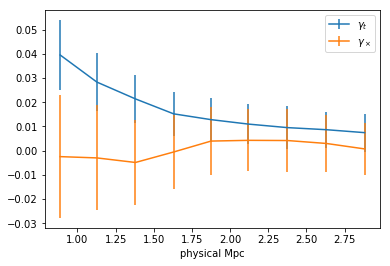

In [265]:
extragalactic_cat = GCRCatalogs.load_catalog('proto-dc2_v2.1.2_test')
# get a massive halo!
massive_halos = extragalactic_cat.get_quantities(['halo_mass', 'redshift','ra', 'dec'], filters=['halo_mass > 1e14','is_central==True'])

m = massive_halos['halo_mass']
select = (m == np.max(m))
ra_cl = massive_halos['ra'][select][0]
dec_cl = massive_halos['dec'][select][0]
z_cl = massive_halos['redshift'][select][0]
#print(m[select], ra_cl, dec_cl, z_cl)

# get galaxies around it
ra_min, ra_max = ra_cl-0.3, ra_cl+0.3
dec_min, dec_max = dec_cl-0.3, dec_cl+0.3
z_min = z_cl + 0.1
z_max = 1.5

coord_filters = [
    'ra >= {}'.format(ra_min),
    'ra < {}'.format(ra_max),
    'dec >= {}'.format(dec_min),
    'dec < {}'.format(dec_max),
]
z_filters = ['redshift >= {}'.format(z_min),'redshift < {}'.format(z_max)]
gal_cat = extragalactic_cat.get_quantities(['ra', 'dec', 'shear_1', 'shear_2', 'shear_2_phosim', 'shear_2_treecorr','redshift'], filters=(coord_filters + z_filters))


ra_src = gal_cat['ra']
dec_src = gal_cat['dec']
gamma_1 = gal_cat['shear_1']
gamma_2 = gal_cat['shear_2']
z_src = gal_cat['redshift']

saa = ShearAzimuthalAverager(ra_src, dec_src, z_src, ra_cl, dec_cl, z_cl, gamma_1, gamma_2)
saa.compute_shear()
saa.make_shear_profile()
saa.plot_profile()
